In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/szeged-weather/weatherHistory.csv


# **importado os dados **

In [2]:
df = pd.read_csv('/kaggle/input/szeged-weather/weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# **Exploração do banco de dados**

In [4]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

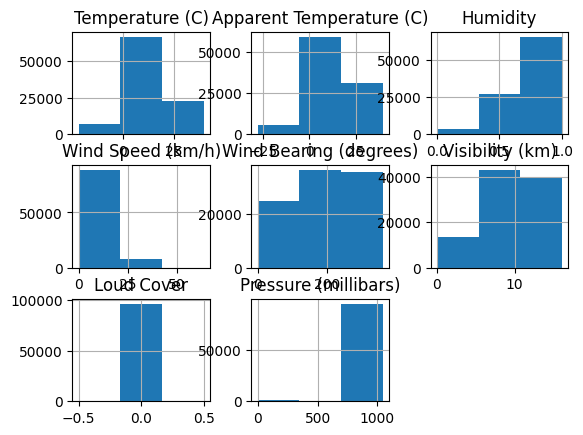

In [6]:
df.hist(bins=3)

In [7]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
colunas_categoricas = []
def object(dataframe):
    for columns in dataframe.columns:
        if dataframe[columns].dtype == 'object':
            colunas_categoricas.append(columns)
        
    return colunas_categoricas

In [9]:
colunas_object = object(df)

In [10]:
df[colunas_object].nunique()

Formatted Date    96429
Summary              27
Precip Type           2
Daily Summary       214
dtype: int64

# **Limpeza do banco de dados**

In [11]:
df[['Formatted Date']]

,Formatted Date
0,2006-04-01 00:00:00.000 +0200
1,2006-04-01 01:00:00.000 +0200
2,2006-04-01 02:00:00.000 +0200
3,2006-04-01 03:00:00.000 +0200
4,2006-04-01 04:00:00.000 +0200
...,...
96448,2016-09-09 19:00:00.000 +0200
96449,2016-09-09 20:00:00.000 +0200
96450,2016-09-09 21:00:00.000 +0200
96451,2016-09-09 22:00:00.000 +0200


In [12]:

df['Formatted Date'] = df['Formatted Date'].str.replace(r'\+0200', '', regex=True)

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, format='mixed')



In [13]:
df['hour'] = df['Formatted Date'].dt.hour
df['day']  = df['Formatted Date'].dt.day
df['month']= df['Formatted Date'].dt.month
df['year'] = df['Formatted Date'].dt.year

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [15]:
df.drop('Formatted Date' , axis=1 , inplace=True)

In [16]:
df.drop('Loud Cover', axis=1 , inplace=True)

In [17]:
y = df['Daily Summary']
X = df.drop('Daily Summary' , axis = 1)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


modelo_Classifier = RandomForestClassifier()
coluna_categorica = [coluna for coluna in df.columns if df[coluna].dtype=='object']
coluna_numericas = [coluna for coluna in df.columns if df[coluna].dtype != 'object']
coluna_categorica.remove('Daily Summary')


variavel_numerica = Pipeline([('imputer', SimpleImputer(strategy='median'))])
                             


variavel_categorica = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])



preprocessador = ColumnTransformer(transformers=[('num' ,variavel_numerica , coluna_numericas) ,
                                                ('cat' , variavel_categorica , coluna_categorica)])

pipeline = Pipeline(steps=[('preprocessador', preprocessador) ,
                          ])




In [19]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X,y, test_size=0.3 )

In [20]:
# Ajuste a pipeline usando apenas as features de treino
X_train = pipeline.fit_transform(X_train)

# Transforme as features de teste
X_val = pipeline.transform(X_val)

In [21]:
import numpy as np

# Verifique a forma do array
print("Shape of X_train:", X_train.dtype)

# Verifique o tipo de dados dos elementos do array
print("Data type of elements in X_train:", X_train.dtype)


Shape of X_train: float64
Data type of elements in X_train: float64


In [22]:
from tensorflow import keras
from tensorflow.keras import layers

2024-05-03 19:02:40.971863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 19:02:40.971991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 19:02:41.122563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
modelo = keras.Sequential([layers.Dense(256 , activation='relu' , input_shape = [39]),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(256 , activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(256 , activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1 , activation='linear')])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
modelo.compile(
    optimizer='adam',
    loss='mae')

In [25]:
history = modelo.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=300,
    epochs=100,
    verbose=0)

print(history)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 39, but received input with shape (None, 38)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 38), dtype=float32)
  • training=True
  • mask=None

In [ ]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();



